In [1]:
#For dataframes
import pandas as pd

#For math stuff
import numpy as np

#For pretty plots
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

#For color palates
import seaborn as sns
import colorsys

#For cycles
from itertools import cycle 

In [2]:
means=pd.read_pickle("summary.pkl")

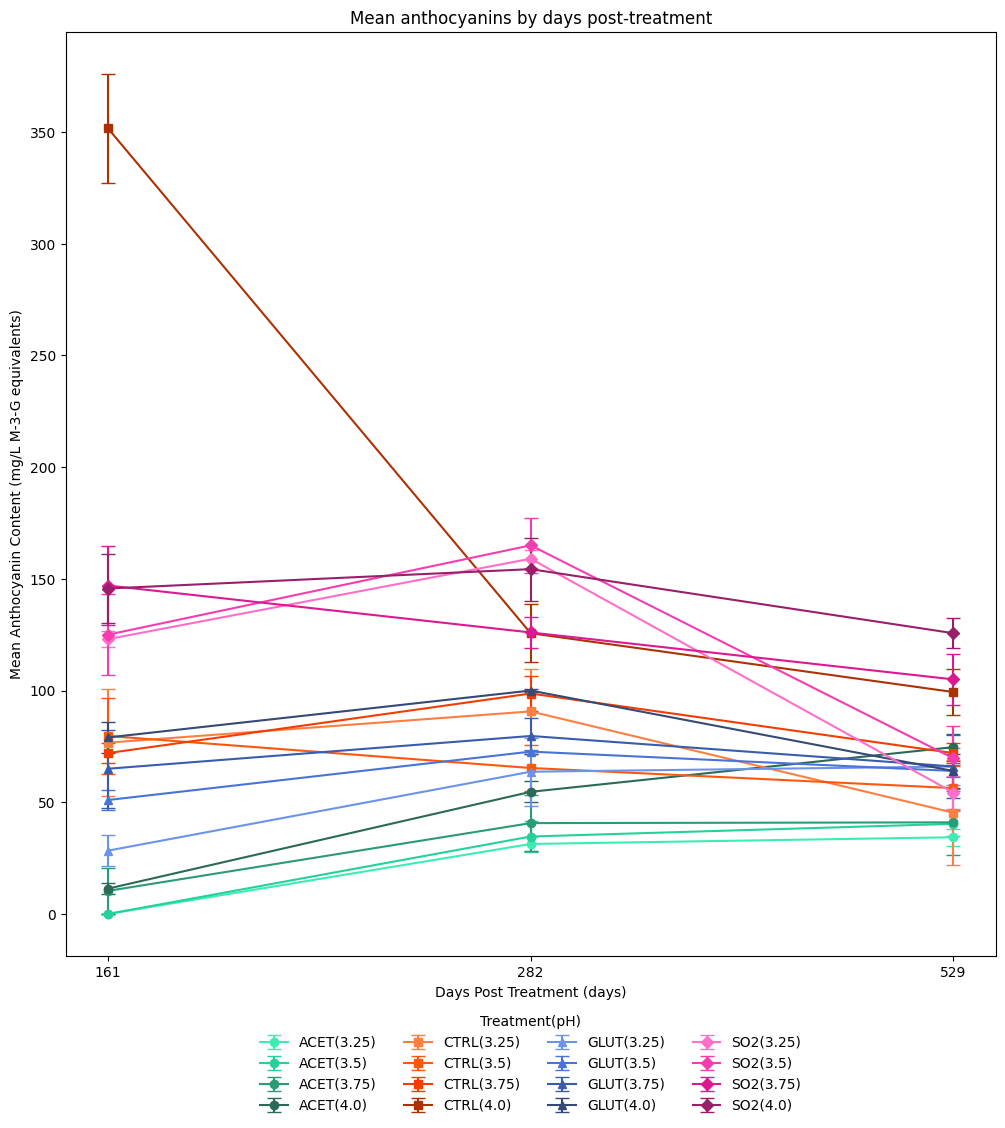

In [3]:
#Figure size in WxH
plt.figure(figsize=(12,12))

#Create unique colors for each treatment in 'trt'
unique_trt=means['trt'].unique()
colors=sns.color_palette("Set2",len(unique_trt)) #Set1 is supposedly a colorblind friendly palette 
trt_colors={trt: colors[i] for i, trt in enumerate(unique_trt)}

#Create unique markers for each treatment in 'trt'
marker_styles=['o','s','^','D']
trt_markers={trt: marker_styles[i % len(marker_styles)] for i, trt in enumerate(unique_trt)}

#Create function to change hue of lines according to pH
def shades(base_color,ph_values):

    base_rgb=np.array(cm.colors.to_rgb(base_color))
    base_hls=colorsys.rgb_to_hls(*base_rgb) #Convert to hue, lightness, saturation (HLS)

    #Normalize pH values between 0 and 1
    min_ph, max_ph = np.min(ph_values), np.max(ph_values)
    normalized = (ph_values - min_ph)/(max_ph-min_ph) if max_ph != min_ph else np.zeros_like(ph_values)
    
    return[
        colorsys.hls_to_rgb(
            base_hls[0],
            max(0.2, base_hls[1]*(1-norm*0.5)),
            base_hls[2] + (0.4*(1-norm))
        ) for norm in normalized
    ]

#Plot all treatments on same plots with unique line types for pH's and colors for treatment
for trt in means['trt'].unique():
    subplot=means[means['trt']==trt]

    #Find base color for current treatment
    base_color=trt_colors[trt]

    #Generate shades
    unique_ph=np.sort(subplot['ph'].unique())
    shade=shades(base_color,unique_ph)
    shade=np.clip(shade,0,1)
    
    for i,ph in enumerate(unique_ph):
        
        ph_plot=subplot[subplot['ph']==ph]
         
        plt.errorbar(
            x=ph_plot['dpt'],
            y=ph_plot['anthos_mean'],
            yerr=ph_plot['anthos_SE'],
            label=f'{trt}({ph})',
            marker=trt_markers[trt],
            linestyle='solid',
            color=shade[i],
            capsize=5,
            markersize=6
        )

plt.xlabel('Days Post Treatment (days)')
plt.ylabel('Mean Anthocyanin Content (mg/L M-3-G equivalents)')
plt.title('Mean anthocyanins by days post-treatment')
plt.legend(title='Treatment(pH)',
           bbox_to_anchor=(0.5,-0.05),
           loc='upper center',
           ncol=4,
           frameon=False
          )

plt.savefig('../99-outputs/anthos_plot.png',dpi=300,bbox_inches='tight')